# Validación Cruzada y Curvas de Validación

## 1. Validación Cruzada

### Carga de Datos

Scikit-Learn provee varias funciones para cargar datasets y también para generar datasets. Hoy vamos a usar el Breast Cancer Wisconsin (diagnostic) dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


`data` es un diccionario con los datos que podemos pasar a un dataframe de Pandas.

In [4]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**Ejercicio:** Nos fijamos cuántos casos hay de cada etiqueta, que están en la columna `target`

In [7]:
# COMPLETAR
df.groupby(['target']).count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0.0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1.0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


**Ejercicio:** Para facilitar el análisis, seleccionamos solo aquellas columnas con atributos *mean*

In [8]:
# COMPLETAR

df=df[(list(df.filter(regex ='mean'))+list(df.filter(regex ='target')))] 

                        

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


Hacemos el pairplot con el nuevo dataframe

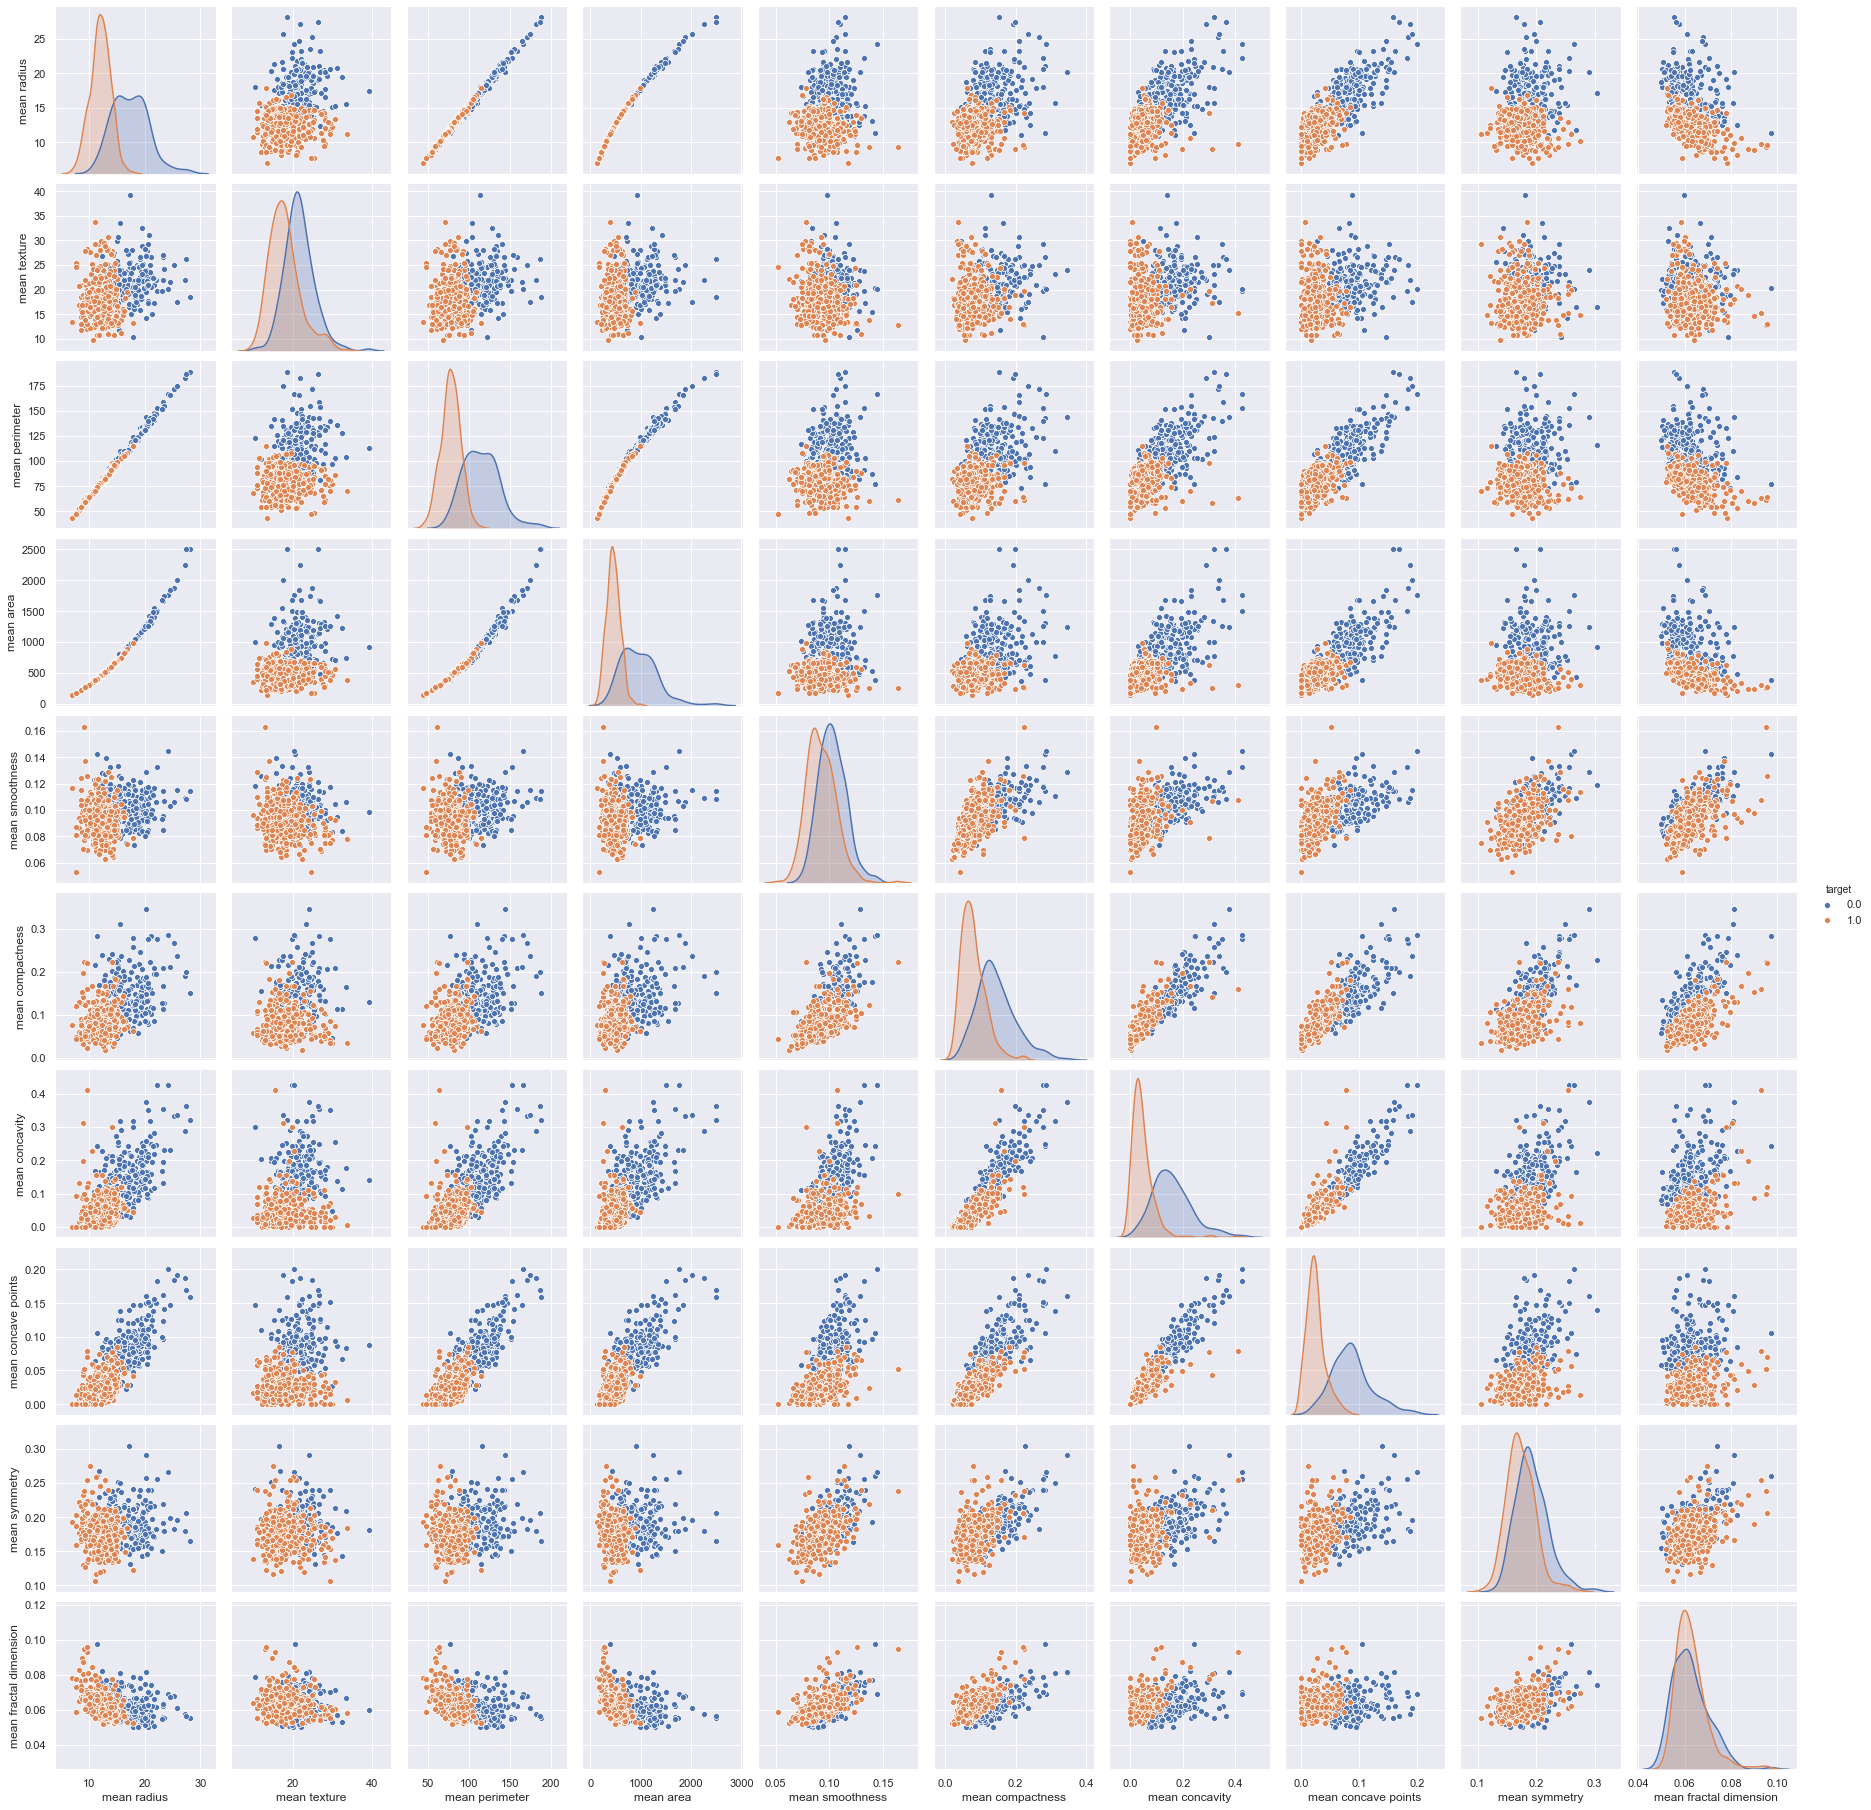

In [10]:
sns.pairplot(df, hue = 'target')

Y la matriz de correlaciones

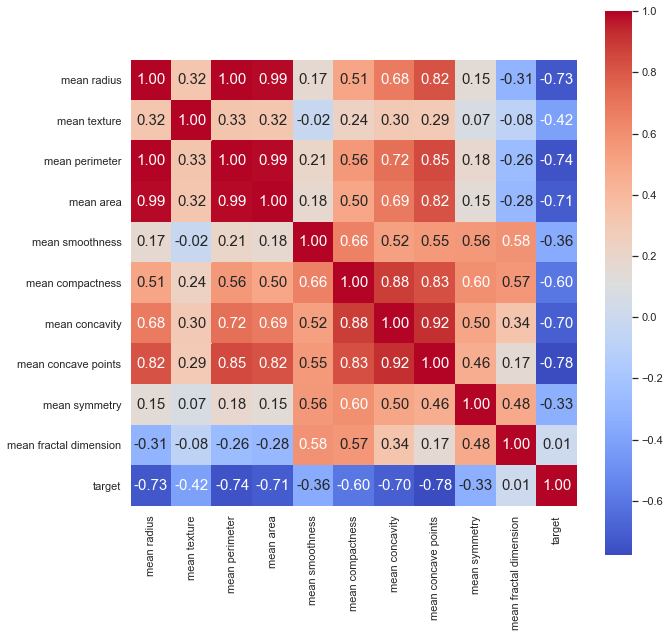

In [11]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
plt.show()

### Entrenamiento de los modelos

Vamos a entrenar un Árbol de Decisión de Profundidad infinita (`max_depth = None`) y un modelo de Vecinos más cercanos con `n_neighbors=1`. Los vamos a entrenar y evaluar haciendo un `train_test_split` (con `test_size=0.10`) de los datos.

Seleccionamos las variables de entrenamiento y etiquetas

In [12]:
# X = df.drop(columns = ['target'])
X = df[['mean radius','mean smoothness', 'mean concave points']]
y = df['target']

Reescalamos los datos.

In [13]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

Una buena práctica cuando separamos en conjuntos de train y test es chequear que las distribuciones que obtenemos sean similares. Obviamente, a medida que tenemos más features, esto se hace más difícil.

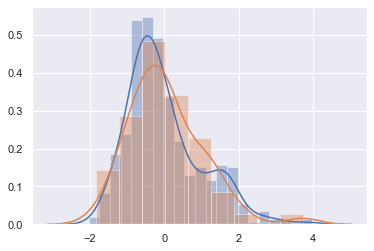

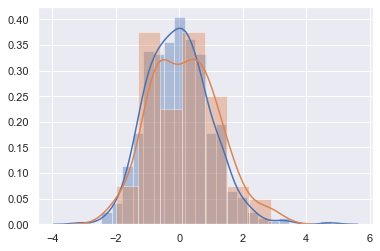

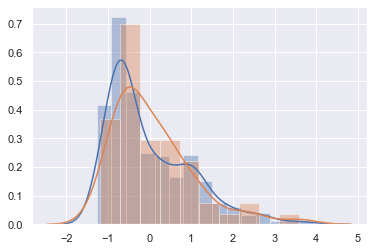

In [15]:
for i in range(X_train.shape[1]):
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

¿Será suficiente chequear esto

Otras cosa que podemos chequear es que la proporción de cada clase en las etiquetas en ambos conjuntos sea parecida.

In [16]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.630859375
Proporcion de etiquetas positiva en los datos de Test:  0.5964912280701754


Y si no lo fuera, ¿qué podemos hacer?¿Qué hace el parámetro `stratify` de la función `train_test_split`?

**Para pensar**: ¿cuál será desempeño aproximado del modelo más sencillo que podemos crear?

#### Entrenamiento de los modelos

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

**Árbol de Decisión**

**Ejercicio:** Crear DecisionTreeClassifier con max_depth como None y entrenar el arbol en train

In [18]:
tree = DecisionTreeClassifier(max_depth = None)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8947368421052632


**KNN**

**Ejercicio:** Crear Knn con n_neighbors como 1 y entrenar el clasificador en train

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = knn.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8771929824561403


¿Qué ocurre con estos modelos?¿El desempeño depende de la partición hecha de los datos? Modificar el `random_state` del `train_test_split` y volver a correr.

### Validación Cruzada

Scikit-Learn tiene varias funciones ya incorporadas que evalúan los modelos usando validación cruzada. Las más sencilla de usar es `cross_val_score`, que evalúa un (1) score - para clasificaciones por default es Accuracy - y un modelo por CV.

**Ejercicio:** Importar cross_val_score y ver los scores usando la validacion cruzada para los clasificadores anteriores y mostrar los scores

In [22]:
from sklearn.model_selection import cross_val_score
def nmsq2rmse(score):
    return np.sqrt(-score)

In [23]:
# Cross Val Score of tree clasificator
scores = cross_val_score(tree,X_train,y_train,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = nmsq2rmse(scores)
print("Scores of Tree Clasificator")
print("Scores RMSE:  ", rmse_scores)
print("Promedio RMSE: ", rmse_scores.mean())
print("Desvío estandar: ", rmse_scores.std())

Scores of Tree Clasificator
Scores RMSE:   [0.39223227 0.41602515 0.31311215 0.34299717 0.24253563 0.24253563
 0.31311215 0.39605902 0.28005602 0.31311215]
Promedio RMSE:  0.32517773084269697
Desvío estandar:  0.05850076317105916


In [24]:
# Cross Val Score of Knn clasificator
scores = cross_val_score(tree,X_train,y_train,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = nmsq2rmse(scores)
print("Scores of Knn clasificator")
print("Scores RMSE:  ", rmse_scores)
print("Promedio RMSE: ", rmse_scores.mean())
print("Desvío estandar: ", rmse_scores.std())

Scores of Knn clasificator
Scores RMSE:   [0.36689969 0.41602515 0.31311215 0.31311215 0.28005602 0.24253563
 0.28005602 0.39605902 0.28005602 0.31311215]
Promedio RMSE:  0.3201023969293125
Desvío estandar:  0.0530423431883264


Notar que ahora obtenemos una evaluación del modelo que no depende tanto de la partición hecha.

`cross_validate` es una función muy parecida, pero un poco más versátil e informativa. Además de devolver los scores, devuelve algunas métricas que pueden ser útiles, como tiempo de fiteo, los modelos entrenados, etc. Además, permite evaluar más de una métrica.

**Ejercicio:** Importar cross_val_score y ver los scores usando la validacion cruzada para los clasificadores anteriores y mostrar los scores

La siguiente celda imprime una lista de todas las métricas que podemos usar para evaluar con `cross_validate`

In [25]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 2. Curvas de Validación

Podemos hacer curvas de validacion usando los conjuntos de train y de test que creamos.

**Ejercicio:** Entrenar el clasificador, predecir y guardar los scores en las listas

In [26]:
from sklearn.metrics import mean_squared_error
scores_train = []
scores_test = []
profundidades = np.arange(1,50)

i=1
for max_depth in profundidades:
    
    tree = DecisionTreeClassifier(max_depth = i) # Creamos un objeto arbol, profundidad variable
    tree.fit(X_train, y_train)
    ypred=tree.predict(X_train)
    tree_mse=mean_squared_error(y_train, ypred)
    scores_train.append(np.sqrt(tree_mse))
    
    ypred=tree.predict(X_test)# scores en Test
    tree_mse=mean_squared_error(y_test, ypred)
    scores_test.append(np.sqrt(tree_mse))
    
    i=i+1

scores_train = np.array(scores_train)
print(scores_train)
scores_test = np.array(scores_test)
print(scores_test)

[0.28298079 0.28298079 0.27243118 0.22097087 0.20252315 0.18221725
 0.14657549 0.10825318 0.07654655 0.04419417 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.35043832 0.29617444 0.29617444 0.37463432 0.37463432 0.37463432
 0.37463432 0.32444284 0.32444284 0.35043832 0.32444284 0.32444284
 0.32444284 0.32444284 0.35043832 0.32444284 0.32444284 0.35043832
 0.35043832 0.32444284 0.32444284 0.35043832 0.35043832 0.29617444
 0.32444284 0.32444284 0.35043832 0.29617444 0.32444284 0.29617444
 0.32444284 0.35043832 0.35043832 0.35043832 0.35043832 0.35043832
 0.32444284 0.32444284 0.35043832 0.29617444 0.29617444 0.29617444
 0.29617444 0.32444284 0.29617444 0.35

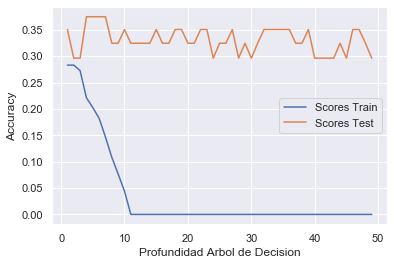

In [27]:
plt.plot(profundidades, scores_train, label = 'Scores Train')
plt.plot(profundidades, scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

**Ejercicio:** Hacer una curva de validación para un modelo de Vecino más Cercanos en función de la cantidad de vecinos.

In [28]:
scores_train = []
scores_test = []
n_vecinos = np.arange(1,50,1)
i=1
for vecinos in n_vecinos:
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_train)
    tree_knn=mean_squared_error(y_train, ypred)
    scores_train.append(np.sqrt(tree_knn))
    
    ypred=knn.predict(X_test) # scores en Test
    tree_knn=mean_squared_error(y_test, ypred)
    scores_test.append(np.sqrt(tree_knn))
    i=i+1
    

scores_train = np.array(scores_train)
print(scores_train)
scores_test = np.array(scores_test)
print(scores_test)

[0.         0.23385359 0.24606275 0.27243118 0.25       0.26516504
 0.2576941  0.26516504 0.26145626 0.27243118 0.27599253 0.28298079
 0.28641098 0.28298079 0.2795085  0.26882266 0.27599253 0.27599253
 0.28298079 0.2795085  0.28641098 0.28298079 0.28298079 0.28298079
 0.2795085  0.2795085  0.2795085  0.2795085  0.28641098 0.28641098
 0.28641098 0.28980058 0.28980058 0.28641098 0.28980058 0.28980058
 0.29646353 0.29646353 0.29646353 0.29315098 0.29646353 0.28980058
 0.29646353 0.28980058 0.29646353 0.29315098 0.30297999 0.29973947
 0.29973947]
[0.35043832 0.35043832 0.29617444 0.32444284 0.32444284 0.32444284
 0.35043832 0.32444284 0.35043832 0.32444284 0.29617444 0.29617444
 0.29617444 0.29617444 0.29617444 0.29617444 0.29617444 0.29617444
 0.29617444 0.29617444 0.29617444 0.29617444 0.29617444 0.29617444
 0.26490647 0.26490647 0.26490647 0.26490647 0.26490647 0.26490647
 0.26490647 0.26490647 0.26490647 0.26490647 0.26490647 0.26490647
 0.26490647 0.26490647 0.26490647 0.26490647 0.26

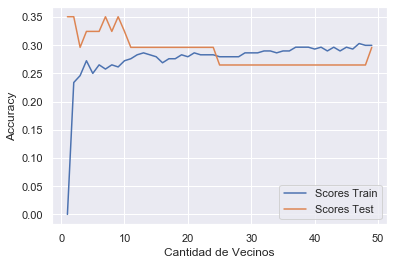

In [29]:
plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

Pero la curva es más informativa si usamos validación cruzada

**EJERCICIO:** Crear y entrenar el clasificador en cada iteracion, usar cross_validate para calcular los scores y guardar la media y std en cada lista correspondiente  
Ver el parametro *return_train_score* de cross_validate

In [29]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)
i=1
for profundidad in profundidades:
    tree= DecisionTreeClassifier(max_depth = i) # Cros validation in each iteration train
    scores = cross_val_score(tree,X_train,y_train,
                             scoring="neg_mean_squared_error", cv=10)
    rmse_scores = nmsq2rmse(scores)
    tree_train_scores_mean.append(rmse_scores.mean())
    tree_train_scores_std.append(rmse_scores.std())
    
                                                # Cros validation in each iteration test
    
    scores = cross_val_score(tree,X_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
    
    rmse_scores = nmsq2rmse(scores)
    tree_test_scores_mean.append(rmse_scores.mean())
    tree_test_scores_std.append(rmse_scores.std())
    i=i+1
    
    
    
tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

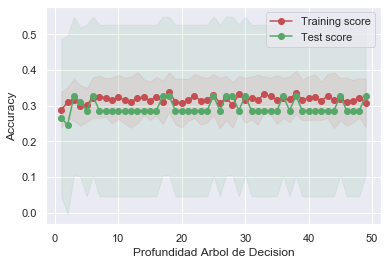

In [30]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

**Ejercicio:** Hacer una curva de validación para un modelo de Vecino más Cercanos en función de la cantidad de vecinos usando Validación Cruzada.

In [31]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,100,1)

for vecinos in n_vecinos:
    knn = KNeighborsClassifier(n_neighbors=i)  # Cros validation in each iteration train
    scores = cross_val_score(knn,X_train,y_train,
                             scoring="neg_mean_squared_error", cv=10)
    rmse_scores = nmsq2rmse(scores)
    knn_train_scores_mean.append(rmse_scores.mean())
    knn_train_scores_std.append(rmse_scores.std())
    
                                                # Cros validation in each iteration test
    
    scores = cross_val_score(knn,X_test,y_test,
                             scoring="neg_mean_squared_error", cv=10)
    
    rmse_scores = nmsq2rmse(scores)
    knn_test_scores_mean.append(rmse_scores.mean())
    knn_test_scores_std.append(rmse_scores.std())
    

    
knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

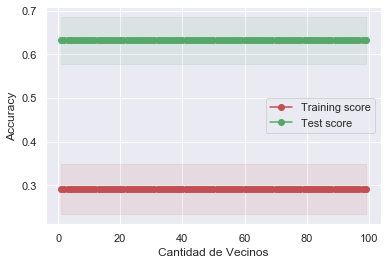

In [32]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()